## Euchre Musings

### Links
- https://www.mathplanet.com/education/algebra-2/discrete-mathematics-and-probability/permutations-and-combinations
- https://math.stackexchange.com/questions/469916/dice-probability-over-multiple-rolls

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [3]:
import compute_scores

In [4]:
dealer_scores, non_dealer_scores, second_round_scores, deck, all_hands = compute_scores.calculate_all_possible_scores()
print("Deck size: %s" % len(deck))
print("All possible hands: %s" % len(all_hands))
print("Dealer scores: %s" % len(dealer_scores))
print("Non-dealer scores: %s" % len(non_dealer_scores))
print("Second round scores: %s" % len(second_round_scores))

Deck size: 24
Hand size: 5
Calculated combinations: 42504
Enumerated combinations: 42504
100000 combinations processed - 1.8 sec
200000 combinations processed - 3.6 sec
300000 combinations processed - 5.4 sec
400000 combinations processed - 7.3 sec
500000 combinations processed - 9.2 sec
600000 combinations processed - 11.0 sec
700000 combinations processed - 12.8 sec
800000 combinations processed - 14.6 sec
807576 combinations processed - 14.7 sec
Deck size: 24
All possible hands: 42504
Dealer scores: 807576
Non-dealer scores: 807576
Second round scores: 807576


### Average Scores

In [5]:
print("Max dealer score: %s" % max(dealer_scores))
print("Max non-dealer score: %s" % max(non_dealer_scores))
print("Max second round score: %s" % max(second_round_scores))
print()
print("Average dealer score: %.1f" % np.mean(dealer_scores))
print("Average non-dealer score: %.1f" % np.mean(non_dealer_scores))
print("Average second round score: %.1f" % np.mean(second_round_scores))

Max dealer score: 15
Max non-dealer score: 14
Max second round score: 15

Average dealer score: 6.6
Average non-dealer score: 2.3
Average second round score: 7.0


### Farmers Odds

[4368, 14560, 15680, 6720, 1120, 56]
[0.10276679841897234, 0.3425559947299078, 0.3689064558629776, 0.15810276679841898, 0.026350461133069828, 0.0013175230566534915]


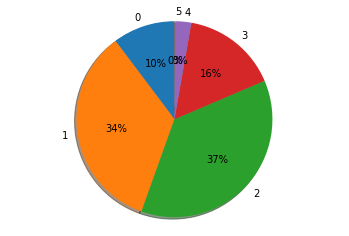

In [9]:
counts = [0,0,0,0,0,0]
for hand in all_hands:
    n = compute_scores.number_of_9s_and_10s(hand)
    counts[n] += 1
print(counts)
averages = [0,0,0,0,0,0]
for i in range(0,6):
    averages[i] = counts[i] / sum(counts)
print(averages)

fig1, ax1 = plt.subplots()
labels = '0', '1', '2', '3', '4', '5'
ax1.pie(averages, autopct='%1.f%%', shadow=True, labels=labels, normalize=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Common Odds

In [10]:
at_least_one_of_a_suit = 0
no_cards_of_a_suit = 0
at_least_one_of_a_card = 0
exactly_one_card = 0
at_least_one_bower = 0
both_bowers = 0
for hand in all_hands:
    if compute_scores.number_of_cards_in_hand('Hearts', hand) > 0:
        at_least_one_of_a_suit += 1
    if compute_scores.number_of_cards_in_hand('Hearts', hand) == 0:
        no_cards_of_a_suit += 1
    if compute_scores.number_of_cards_in_hand('Ace', hand) > 0:
        at_least_one_of_a_card += 1
    if compute_scores.card_in_hand(('Ace', 'Hearts'), hand):
        exactly_one_card += 1
    bowers = compute_scores.number_of_bowers_in_hand(hand)
    if bowers >= 1:
        at_least_one_bower += 1
    if bowers == 2:
        both_bowers += 1

bernoulli_at_least_one_of_a_suit = 1 - compute_scores.bernoulli_trial(5, 0, 1/4)
bernoulli_no_cards_of_a_suit = compute_scores.bernoulli_trial(5, 0, 1/4)
bernoulli_at_least_one_of_a_card = 1 - compute_scores.bernoulli_trial(5, 0, 1/6)
bernoulli_exactly_one_card = compute_scores.bernoulli_trial(5, 1, 1/24)
bernoulli_at_least_one_bower = compute_scores.bernoulli_trial(5, 1, 1/12) + compute_scores.bernoulli_trial(5, 2, 1/12)
bernoulli_both_bowers = compute_scores.bernoulli_trial(5, 2, 1/12)

print("Odds for any given hand:")
print("\tSimulation: Odds of at least one card of a suit: %.1f%%" % (100 * at_least_one_of_a_suit / len(all_hands)))
print("\tBernoulli: Odds of at least one card of a suit: %.1f%%" % (100 * bernoulli_at_least_one_of_a_suit))
print("\tSimulation: Odds of no cards of a suit: %.1f%%" % (100 * no_cards_of_a_suit / len(all_hands)))
print("\tBernoulli: Odds of no cards of a suit: %.1f%%" % (100 * bernoulli_no_cards_of_a_suit))
print("\tSimulation: Odds of at least one type of card, e.g. Ace: %.1f%%" % (100 * at_least_one_of_a_card / len(all_hands)))
print("\tBernoulli: Odds of at least one type of card, e.g. Ace: %.1f%%" % (100 * bernoulli_at_least_one_of_a_card))
print("\tSimulation: Odds of exactly one card, e.g. Ace of Hearts: %.1f%%" % (100 * exactly_one_card / len(all_hands)))
print("\tBernoulli: Odds of exactly one card, e.g. Ace of Hearts: %.1f%%" % (100 * bernoulli_exactly_one_card))
print("\tSimulation: Odds of at least one bower: %.1f%%" % (100 * at_least_one_bower / len(all_hands)))
print("\tBernoulli: Odds of at least one bower: %.1f%%" % (100 * bernoulli_at_least_one_bower))
print("\tSimulation: Odds of both bowers: %.1f%%" % (100 * both_bowers / len(all_hands)))
print("\tBernoulli: Odds of both bowers: %.1f%%" % (100 * bernoulli_both_bowers))
    

Odds for any given hand:
	Simulation: Odds of at least one card of a suit: 79.8%
	Bernoulli: Odds of at least one card of a suit: 76.3%
	Simulation: Odds of no cards of a suit: 20.2%
	Bernoulli: Odds of no cards of a suit: 23.7%
	Simulation: Odds of at least one type of card, e.g. Ace: 63.5%
	Bernoulli: Odds of at least one type of card, e.g. Ace: 59.8%
	Simulation: Odds of exactly one card, e.g. Ace of Hearts: 20.8%
	Bernoulli: Odds of exactly one card, e.g. Ace of Hearts: 17.6%
	Simulation: Odds of at least one bower: 38.0%
	Bernoulli: Odds of at least one bower: 34.8%
	Simulation: Odds of both bowers: 3.6%
	Bernoulli: Odds of both bowers: 5.3%


In [11]:
odds = compute_scores.bernoulli_trial(5, 2, 2/19)
print("\nOdds a hand has two bowers if your hand has none: %.1f%%" % (100 * odds))


Odds a hand has two bowers if your hand has none: 7.9%


### Dealer Scores

Text(0.5, 1.0, 'Euchre Dealer Hand Scores')

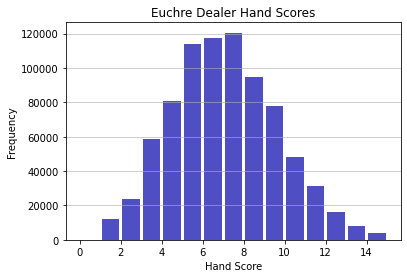

In [12]:
hist, bins, patches = plt.hist(x=dealer_scores, range=(0, max(dealer_scores)), 
                            bins=max(dealer_scores), color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Hand Score')
plt.ylabel('Frequency')
plt.title('Euchre Dealer Hand Scores')

In [ ]:
print(hist)
print(bins)
total = sum(hist)
cumulative_pct = 0
table_data = []

for entry in hist:
    pct = entry / total * 100
    cumulative_pct += pct
    table_data.append([entry, pct, cumulative_pct])
df = pd.DataFrame(table_data, columns=["Count", "%", "Cumulative %"])
df

### Non-Dealer Scores

In [ ]:
hist, bins, patches = plt.hist(x=non_dealer_scores, range=(0, max(non_dealer_scores)), 
                            bins=max(non_dealer_scores), color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Hand Score')
plt.ylabel('Frequency')
plt.title('Euchre Non-Dealer Hand Scores')

In [ ]:
print(hist)
print(bins)
total = sum(hist)
cumulative_pct = 0
table_data = []

for entry in hist:
    pct = entry / total * 100
    cumulative_pct += pct
    table_data.append([entry, pct, cumulative_pct])
df = pd.DataFrame(table_data, columns=["Count", "%", "Cumulative %"])
df

### Second Round Scores

In [ ]:
hist, bins, patches = plt.hist(x=second_round_scores, range=(0, max(second_round_scores)), 
                            bins=max(second_round_scores), color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Hand Score')
plt.ylabel('Frequency')
plt.title('Euchre Second Round Hand Scores')

In [ ]:
print(hist)
print(bins)
total = sum(hist)
cumulative_pct = 0
table_data = []

for entry in hist:
    pct = entry / total * 100
    cumulative_pct += pct
    table_data.append([entry, pct, cumulative_pct])
df = pd.DataFrame(table_data, columns=["Count", "%", "Cumulative %"])
df